Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

Multiclass logistic regression accuracy: 0.9211

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


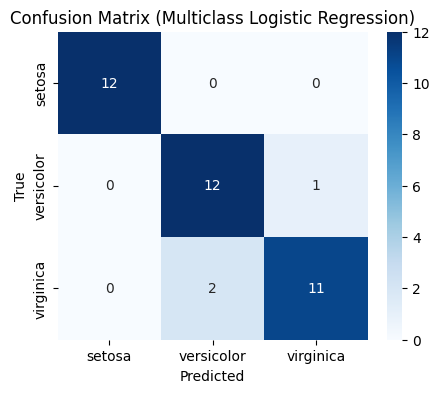

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

iris = datasets.load_iris()
X = iris.data          # shape (150, 4)
y = iris.target        # 0=setosa,1=versicolor,2=virginica
feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Classes:", target_names)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    max_iter=200,
    random_state=42
)


clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nMulticlass logistic regression accuracy: {acc:.4f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=target_names))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Multiclass Logistic Regression)')
plt.show()